In [1]:
#/kaggle/input/complete/text_balanced.csv# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testforbalabludata/test_data.xlsx
/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/test.csv
/kaggle/input/balabludata/text_balanced_label_num.csv


According to Jimmy Gomez,  **"When fake news is repeated, it becomes difficult for the public to discern what's real "**

Hence, in this notebook let's predict ✍ the fake news 📜 & keep on sharing the truth 🧾 to everyone across the universe👍

**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import string


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**PRE PROCESSING OF DATA**

In [5]:
news_data = pd.read_csv('/kaggle/input/balabludata/text_balanced_label_num.csv')
news_data.head()

,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label
0,ActivistPost,2016-11-08T17:20:22.420+02:00,reasons why i am not voting,by justin gardner as the controversial dakota ...,english,activistpost.com,No Image URL,conspiracy,reasons voting,justin gardner controversial dakota access pip...,0,0
1,No Author,2016-11-18T11:40:54.247+02:00,ne supportant plus lambiance de la campagne él...,lifting weights could ward off dementia and ma...,english,legorafi.fr,No Image URL,satire,primaire françois fillon se désiste au profit ...,keywords alkaline water water either acidic al...,0,0
2,Dr. Patrick Slattery,2016-11-16T11:07:07.314+02:00,slattery and dankof we won now what,editorial by dr david duke \ntrump appoints m...,english,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,slattery dankof,editorial dr david duke trump appoints men tak...,1,1
3,The Independent,2016-10-28T18:51:02.589+03:00,social media activity can show early signs of ...,draftourdaughters prowar hillary faces backlas...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,conspiracy,black activist blasts hillary clinton wikileak...,globalists behind rigged us elections election...,1,0
4,Hrafnkell Haraldsson,2016-10-31T18:27:33.972+02:00,it turns out trump put off investigators for ...,interviews syria should be able to choose its ...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,explosive audio surfaces gop senator joking gu...,file photo shows former rebel renamo fighters ...,1,1


In [6]:
news_data.shape

(2232, 12)

<AxesSubplot:xlabel='label', ylabel='count'>

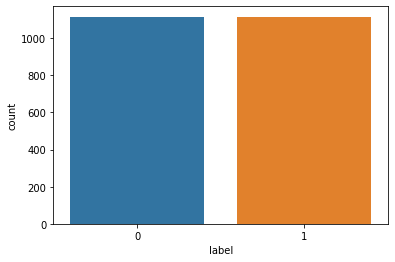

In [7]:
# Check Count of labels shows balanced dataset
import seaborn as sns
sns.countplot(x='label',data=news_data)

In [8]:
# counting the number of missing values in the dataset
news_data.isnull().sum()

author                     1
published                  0
title                      0
text                       0
language                   2
site_url                   2
main_img_url               2
type                       2
title_without_stopwords    4
text_without_stopwords     3
hasImage                   1
label                      0
dtype: int64

In [9]:
# replacing the null values with empty string
news_data = news_data.fillna('')

In [10]:
# checking the number of missing values in the dataset
news_data.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
label                      0
dtype: int64

In [11]:
# merging the author name and news title
news_data['content'] = news_data['author']+' '+news_data['title']

In [12]:
print(news_data['content'])

0                ActivistPost reasons why i am not voting
1       No Author ne supportant plus lambiance de la c...
2       Dr. Patrick Slattery slattery and dankof we wo...
3       The Independent social media activity can show...
4       Hrafnkell Haraldsson it turns out trump put of...
                              ...                        
2227    Alex Ansary wikileaks documents reveal united ...
2228            No Author debate washingtons syria policy
2229    Jason Easley trump is deadbeating on his campa...
2230                 Activist Post police state elections
2231    No Author north carolina hillary supporter bra...
Name: content, Length: 2232, dtype: object


In [13]:
# separating the data & label

## Get the Independent Features
X = news_data.drop(columns='label', axis=1)
## Get the Dependent features
Y = news_data['label']

In [14]:
Y.value_counts()

0    1116
1    1116
Name: label, dtype: int64


Let's make wordcloud of True and Fake News Respectively. so, we can analyze that which words are often used in both type of news.

In [15]:
# import wordcloud
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='white',min_font_size=10,width=500,height=500)

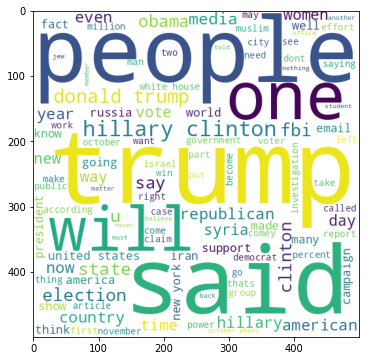

In [16]:
# WordCloud for True News
import matplotlib.pyplot as plt
true_news_wc = wc.generate(news_data[news_data['label'] == 1]['text'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()


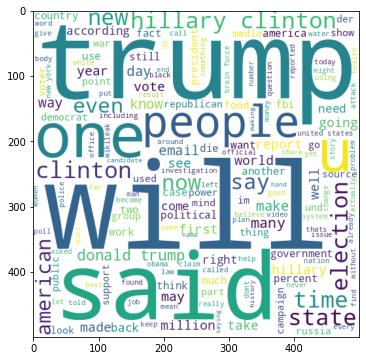

In [17]:
# WordCloud for True News
import matplotlib.pyplot as plt
true_news_wc = wc.generate(news_data[news_data['label'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()


We can clearly see from this wordcloud the words that are mostly used in true and fake news.

Let's find specific word count

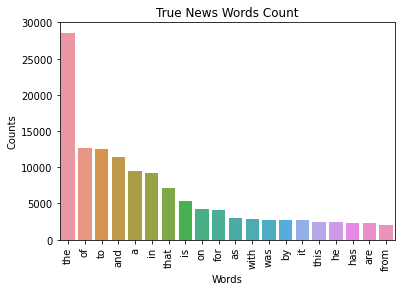

In [18]:
# library for True news Count Words
from collections import Counter

# create list of True News words
true_news_words_list = news_data[news_data['label']==1]['text'].str.cat(sep = " ").split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

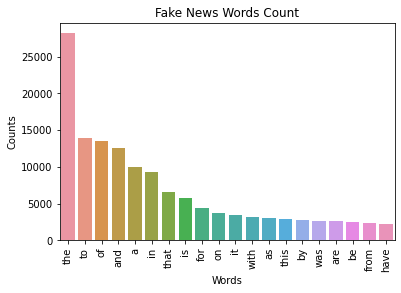

In [19]:
# library for Fake news Count Words
from collections import Counter

# create list of True News words
true_news_words_list = news_data[news_data['label']==0]['text'].str.cat(sep = " ").split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()

In [20]:
X.shape

(2232, 12)

In [21]:
Y.shape

(2232,)

In [22]:
print(X)
print(Y)

                    author                      published  \
0             ActivistPost  2016-11-08T17:20:22.420+02:00   
1                No Author  2016-11-18T11:40:54.247+02:00   
2     Dr. Patrick Slattery  2016-11-16T11:07:07.314+02:00   
3          The Independent  2016-10-28T18:51:02.589+03:00   
4     Hrafnkell Haraldsson  2016-10-31T18:27:33.972+02:00   
...                    ...                            ...   
2227           Alex Ansary  2016-11-02T18:47:19.431+02:00   
2228             No Author  2016-10-27T01:27:51.763+03:00   
2229          Jason Easley  2016-11-01T02:04:45.448+02:00   
2230         Activist Post  2016-11-08T01:20:32.516+02:00   
2231             No Author  2016-10-28T18:34:49.524+03:00   

                                                  title  \
0                           reasons why i am not voting   
1     ne supportant plus lambiance de la campagne él...   
2                   slattery and dankof we won now what   
3     social media activity can

**STEMMING:**

* A stemming algorithm is a process of linguistic normalisation, in which the variant forms of a word are reduced to a common form.
* In simple words, Stemming is the process of reducing a word to its Root word.

* **EXAMPLES:** 

  1. actor, actress, acting --> act
  2. eating, eats, eaten --> eat

In [23]:
port_stem = PorterStemmer()

In [24]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [25]:
news_data['content'] = news_data['content'].apply(stemming)

In [26]:
print(news_data['content'])

0                                activistpost reason vote
1       author ne support plu lambianc de la campagn l...
2                     dr patrick slatteri slatteri dankof
3       independ social media activ show earli sign de...
4       hrafnkel haraldsson turn trump put investig mo...
                              ...                        
2227    alex ansari wikileak document reveal unit nati...
2228                 author debat washington syria polici
2229    jason easley trump deadbeat campaign debt refu...
2230                      activist post polic state elect
2231    author north carolina hillari support brag fac...
Name: content, Length: 2232, dtype: object


In [27]:
#separating the data and label
X = news_data['content'].values
Y = news_data['label'].values

In [28]:
print(X)

['activistpost reason vote'
 'author ne support plu lambianc de la campagn lectoral un fran ai chanceux cide daller vivr dan lespac le gorafi'
 'dr patrick slatteri slatteri dankof' ...
 'jason easley trump deadbeat campaign debt refus pay pollster'
 'activist post polic state elect'
 'author north carolina hillari support brag facebook vote multipl time']


In [29]:
print(Y)

[0 0 1 ... 1 0 0]


In [30]:
Y.shape

(2232,)

**TF-IDF stands for “Term Frequency – Inverse Document Frequency ”**

* TF-IDF is a numerical statistic which measures the importance of the word in a document.

* Term Frequency : Number of time a word appears in a text document.
* Inverse Document Frequency : Measure the word is a rare word or common word in a document.

In [31]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [32]:
print(X)

  (0, 4262)	0.44419619292640344
  (0, 3220)	0.6130258105285444
  (0, 38)	0.653367505937899
  (1, 4247)	0.26573620157472805
  (1, 4125)	0.16994163786758543
  (1, 3856)	0.1403181497355589
  (1, 2976)	0.22932528502437072
  (1, 2649)	0.25229801563079857
  (1, 2265)	0.26573620157472805
  (1, 2252)	0.26573620157472805
  (1, 2241)	0.15905414435204068
  (1, 2207)	0.26573620157472805
  (1, 2197)	0.1929143684740133
  (1, 1638)	0.16110485886209797
  (1, 1507)	0.22932528502437072
  (1, 964)	0.17384527914901654
  (1, 937)	0.20369972741097472
  (1, 932)	0.26573620157472805
  (1, 698)	0.26573620157472805
  (1, 645)	0.26573620157472805
  (1, 571)	0.25229801563079857
  (1, 278)	0.0742495244569271
  (1, 91)	0.2427634709683002
  (2, 3637)	0.7124009650554908
  (2, 2882)	0.3552066181323935
  :	:
  (2228, 278)	0.1827915570843768
  (2229, 4083)	0.14291768119520065
  (2229, 3251)	0.3629750137740487
  (2229, 2997)	0.3957284543824859
  (2229, 2887)	0.3571039731429252
  (2229, 2038)	0.2255492851445389
  (2229, 1

**SPLITTING THE DATASET INTO TRAINING DATA & TEST DATA:**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

**LOGESTIC REGRESSION:**

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9876750700280112


In [38]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9395973154362416


**CONFUSION MATRIX:**

* The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label. 



In [40]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


        

    
    

In [41]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

**CLASSIFICATION MODEL : MULTINOMIAL NAIVE BAYES**

* Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP)

* Multinomial Naïve Bayes uses term frequency i.e. the number of times a given term appears in a document. Term frequency is often normalized by dividing the raw term frequency by the document length


In [42]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.896
Confusion matrix, without normalization


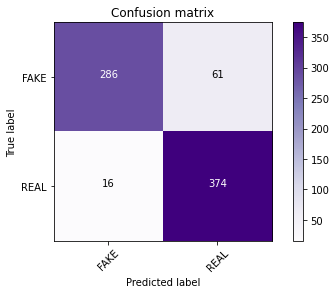

In [43]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X1_train, Y1_train)
prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y1_test, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

**CLASSIFICATION MODEL : PASSIVE AGGRESSIVE CLASSIFIER**

* Passive Aggressive Classifier works by responding as passive for correct classifications and responding as aggressive for any miscalculation.

In [44]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.947
Confusion matrix, without normalization


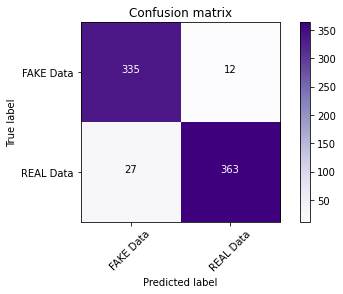

In [45]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

**BUILDING A PREDICTIVE SYSTEM:**

Building a predictive system inorder to find that the inital word in the dataset is real or fake using LogisticRegression model: 

In [46]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


In [47]:
print(Y_test[0])

1


Building a predictive system inorder to find that the inital word in the dataset is real or fake using Multinomial Naive Bayes model: 

In [48]:
X1_new = X1_test[0]

prediction = model.predict(X1_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Fake


In [49]:
print(Y1_test[0])

0


Building a predictive system inorder to find that the inital word in the dataset is real or fake using Passive Aggressive Classifier: 

In [50]:
X2_new = X2_test[0]

prediction = model.predict(X2_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Fake


In [51]:
print(Y2_test[0])

0


**CLASSIFICATION REPORT:**

* A Classification report is used to measure the quality of predictions from a classification algorithm.

* It is used to show the precision, recall, F1 Score, and support of your trained classification model.

Classification report for logistic regression model:

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       224
           1       0.93      0.95      0.94       223

    accuracy                           0.94       447
   macro avg       0.94      0.94      0.94       447
weighted avg       0.94      0.94      0.94       447



In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test,prediction1))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       347
           1       0.86      0.96      0.91       390

    accuracy                           0.90       737
   macro avg       0.90      0.89      0.89       737
weighted avg       0.90      0.90      0.89       737



In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y2_test,prediction2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.94       347
           1       0.97      0.93      0.95       390

    accuracy                           0.95       737
   macro avg       0.95      0.95      0.95       737
weighted avg       0.95      0.95      0.95       737



**MODEL COMPARISON**

Hence, in this dataset we can observe that

* Logistic Regression : Accuracy is 0.94

* Multinomial Naive Bayes : Accuracy is 0.90

* Passive Aggressive Classifier : Accuracy is 0.95

In [55]:
# Function for entire text transformation

def text_preprocessing(text): 
    # Convert text into lowercase
    text = text.lower()
    
    # Tokenize text into list
    tokenize_text = nltk.word_tokenize(text)
    
    # remove Stopwords
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords.words('english')]
    
    # Remove Punctuation
    text_without_punc = [i for i in text_without_stopwords if i not in string.punctuation]
    
    # fetch only alphanumeric values and apply stemming on that word
    transformed_text = [port_stem.stem(i) for i in text_without_punc if i.isalnum() == True]
    
    return " ".join(transformed_text)

In [56]:


def predict_news(text):
    cleaned_text = text_preprocessing(text)
    port_stem = pd.Series(cleaned_text)
    final_text = vectorizer.transform(port_stem).toarray()
    pred = linear_clf.predict(final_text.reshape(1,-1))[0]
    
    if pred == 1:
        print("It's a True News")
    
    else:
        print("It's a Fake News")



In [57]:
pip install openpyxl

     |████████████████████████████████| 250 kB 288 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [58]:
# Read test data
df_test = pd.read_excel("/kaggle/input/testforbalabludata/test_data.xlsx")

# Preprocess test data
X_test = vectorizer.transform(df_test['text'].values.astype('U')) #You need to convert the dtype object to unicode string as is clearly mentioned in the traceback

# Predict class labels for test data
y_test_pred = model.predict(X_test)

# Write predictions to output file
df_test['label'] = y_test_pred
df_test.to_csv("test_predictions1.csv", index=False)

In [59]:
predict_news("iom says  refugees have died worldwide in")

It's a Fake News


In [60]:
predict_news("jame comey loretta lynch tri influenc statement hillari clinton investig charli spier")

It's a Fake News


In [61]:
predict_news("No Author2016-10-28T18:02:48.492+03:00tony blair suggests a second referendum to reverse brexit")

It's a True News


In [62]:
print("Successfully we have predicted the fake news using logistic regression, Multinomial Naive Bayes & Passive Aggressive Classifier ")

Successfully we have predicted the fake news using logistic regression, Multinomial Naive Bayes & Passive Aggressive Classifier 


According to Dr.Karishma Ahuja, "**Speak your truth, Speaking your truth is an act of loving & respecting yourself**"

**Hence let's speak truth & every glittering ounce of it will be cherished,  hoarded, worshipped & fondled like a priceless diamond !!**